<a href="https://colab.research.google.com/github/joyfulspace/ADP/blob/master/07_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_11_SNA%EC%82%AC%ED%9A%8C%EC%97%B0%EA%B2%B0%EB%A7%9D%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 의미 연결망 분석(Semantic Network Analysis)
* 사회 연결망 분석(Social Network Analysis)는 분석 대상 및 분석 대상들간의 관계를 연결망 구조로 표현하고 이를 계량적으로 제시하는 분석 기법
* 사회 연결망 분석은 사람, 장소, 물품 등의 객체 간의 관계를 분석하는데 효과적이며 주로 친구 관계, 전력 공급 등을 분석하는데 사용
* 사회 연결망 분석 기법을 텍스트 내 단어의 관계에 적용한 것이 바로 의미 연결망 분석
* 의미 연결망 분석에서는 일정한 범위 내에서 어휘가 동시에 등장하면 서로 연결된 것으로 간주, 이 연결 관계들을 분석

[출처] https://chasingdreams.tistory.com/40

추가 예제 https://anweh.tistory.com/33

## n-gram
* nltk 라이브러리는 편하게 n-gram을 생성할 수 있는 함수를 제공
많이 사용되는 bigrams의 경우에는 별도의 함수를 제공하니 해당 내용을 참조하여 n-gram 생성
* window size가 2보다 큰 경우 ngram 함수에 window size를 인자로 넣어 사용가능

In [2]:
import nltk
nltk.download("punkt")


from nltk import word_tokenize, bigrams

sentence = "I love data science and deep learning"
tokens = word_tokenize(sentence)

bgram = bigrams(tokens)
bgram_list = [x for x in bgram]
print(bgram_list)

[('I', 'love'), ('love', 'data'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('deep', 'learning')]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
from nltk.util import ngrams

tgram = ngrams(tokens, 3) # trigram
qgram = ngrams(tokens, 4) # quadgram

tgram_list = [x for x in tgram]
qgram_list = [x for x in qgram]
print(tgram_list)
print(qgram_list)

[('I', 'love', 'data'), ('love', 'data', 'science'), ('data', 'science', 'and'), ('science', 'and', 'deep'), ('and', 'deep', 'learning')]
[('I', 'love', 'data', 'science'), ('love', 'data', 'science', 'and'), ('data', 'science', 'and', 'deep'), ('science', 'and', 'deep', 'learning')]


### 어휘 동시 출현 빈도의 계수화
* 동시 출현(Co-occurrence)란 두 개 이상의 어휘가 일정한 범위나 거리 내에서 함께 출현하는 것을 의미
* 단어간의 동시 출현 관계를 분석하면 문서나 문장으로부터 두 단어가 유사한 의미를 가졌는지 등의 추상화된 정보를 얻을 수 있음
동시 출현 빈도는 Window라는 지정 범위 내에서 동시 등장한 어휘를 확률 등으로 계수화 가능
* 예를 들어, 단어 뒤 잘못된 단어가 온다면, 이를 동시 출현 빈도가 높은 단어로 교정 가능
 

* 어휘 동시 출현 빈도 행렬은 하나하나 측정할 수도 있지만, 바이그램 개수를 정리하면 편리하게 만들어 볼 수 있음
* nltk에서 제공하는 ConditionalFreqDist 함수를 이용하면 문맥별 단어 빈도를 쉽게 측정 가능

In [20]:
from nltk.probability import ConditionalFreqDist
from nltk.tokenize import word_tokenize

sentences = ["I love data science and deep learning", 'I love science', 'I know this code']
tokens = [word_tokenize(x) for x in sentences]
bgrams = [bigrams(x) for x in tokens]

token = []
for i in bgrams:
  token += ([x for x in i])

cfd = ConditionalFreqDist(token)
cfd.conditions()

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']

In [21]:
import numpy as np

freq_matrix = []

for i in cfd.keys() :
    temp = []
    for j in cfd.keys() :
        temp.append(cfd[i][j])
    freq_matrix.append(temp)
freq_matrix = np.array(freq_matrix)

print(cfd.keys())
print(freq_matrix)

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this'])
[[0 2 0 0 0 0 1 0]
 [0 0 1 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]


In [23]:
import pandas as pd

df = pd.DataFrame(freq_matrix, index=cfd.keys(), columns=cfd.keys())
df.style.background_gradient(cmap='coolwarm')

,I,love,data,science,and,deep,know,this
I,0,2,0,0,0,0,1,0
love,0,0,1,1,0,0,0,0
data,0,0,0,1,0,0,0,0
science,0,0,0,0,1,0,0,0
and,0,0,0,0,0,1,0,0
deep,0,0,0,0,0,0,0,0
know,0,0,0,0,0,0,0,1
this,0,0,0,0,0,0,0,0


* 동시 출현 빈도 행렬은 인접 행렬로도 간주할 수 있음
* networkx 라이브러리를 사용해 해당 행렬을 그래프로 시각화

In [24]:
import networkx as nx

G = nx.from_pandas_adjacency(df)

In [25]:
print(G.nodes)
print(G.edges)

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']
[('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('know', 'this')]


* 각 엣지에 접근해보면 각 엣지의 가중치에 각 단어간의 빈도가 사용된 것을 확인 가능

In [26]:
print(G.edges()[('I', 'love')])
print(G.edges()[('I', 'know')])

{'weight': 2}
{'weight': 1}


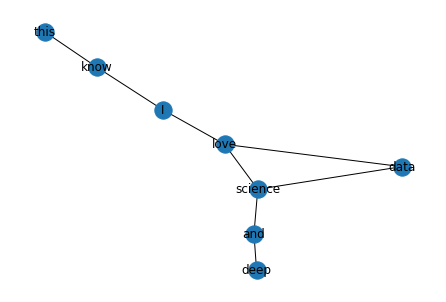

In [28]:
nx.draw(G, with_labels=True)

* 어휘 동시 출현 빈도를 이용하면 어휘 동시 출현 확률까지 측정 가능
* 어휘 동시 출현 확률은 nltk의 ConditionalProbDist 이용

In [29]:
from nltk.probability import ConditionalProbDist, MLEProbDist

cpd = ConditionalProbDist(cfd, MLEProbDist)
print(cpd.conditions())

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']


In [30]:
prob_matrix = []
for i in cpd.keys():
    prob_matrix.append([cpd[i].prob(j) for j in cpd.keys()])
prob_matrix = np.array(prob_matrix)

print(cpd.keys())
print(prob_matrix)

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this'])
[[0.         0.66666667 0.         0.         0.         0.
  0.33333333 0.        ]
 [0.         0.         0.5        0.5        0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]


In [31]:
prob_df = pd.DataFrame(prob_matrix, index=cpd.keys(), columns=cpd.keys())
prob_G = nx.from_pandas_adjacency(prob_df)

In [32]:
print(prob_G.nodes())
print(prob_G.edges())

['I', 'love', 'data', 'science', 'and', 'deep', 'know', 'this']
[('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('know', 'this')]


In [33]:
print(prob_G.edges()[('I', 'love')])
print(prob_G.edges()[('I', 'know')])

{'weight': 0.6666666666666666}
{'weight': 0.3333333333333333}


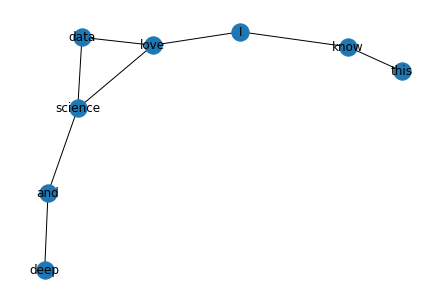

In [34]:
nx.draw(prob_G, with_labels=True)

## 중심성 지수

### 1. 연결 중심성 (Degree Centrality)
- (특정 노드 i와 직접적으로 연결된 노드 수 / 노드 i와 직간접적으로 연결된 노드 수)

In [35]:
nx.degree_centrality(G)

{'I': 0.2857142857142857,
 'love': 0.42857142857142855,
 'data': 0.2857142857142857,
 'science': 0.42857142857142855,
 'and': 0.2857142857142857,
 'deep': 0.14285714285714285,
 'know': 0.2857142857142857,
 'this': 0.14285714285714285}

### 2. 위세 중심성 (Eigenvector Centrality)
- 연결된 상대 단어의 중요성에 가중치를 둠

In [36]:
# weight로는 어휘 동시 출현 빈도를 사용
nx.eigenvector_centrality(G, weight='weight')

{'I': 0.5055042648573065,
 'love': 0.6195557831651917,
 'data': 0.35703593885196566,
 'science': 0.39841035839294925,
 'and': 0.15933837227495717,
 'deep': 0.055886131430398216,
 'know': 0.20216573350291445,
 'this': 0.07090581134630142}

### 3. 근접 중심성 (Closeness Centrality)
* 한 단어가 다른 단어에 얼마나 가깝게 있는지
* 직간접적으로 연결된 모든 노드들 사이의 거리를 측정

In [37]:
nx.closeness_centrality(G, distance='weight')

{'I': 0.35,
 'love': 0.4375,
 'data': 0.3684210526315789,
 'science': 0.4117647058823529,
 'and': 0.3333333333333333,
 'deep': 0.25925925925925924,
 'know': 0.2916666666666667,
 'this': 0.23333333333333334}

### 4. 매개 중심성
* 단어들과의 연결망을 구축하는데 얼마나 도움을 주는지
* 매개 중심성이 높으면 단어 간 의미부여 역할이 커서, 해당 단어를 제거하면 의사소통이 어려워짐
* 모든 노드 간 최단 경로에서 특정 노드가 등장하는 횟수로 측정

In [38]:
nx.betweenness_centrality(G)

{'I': 0.47619047619047616,
 'love': 0.5714285714285714,
 'data': 0.0,
 'science': 0.47619047619047616,
 'and': 0.2857142857142857,
 'deep': 0.0,
 'know': 0.2857142857142857,
 'this': 0.0}

### 페이지 랭크
* 문서의 상대적 중요도에 따라 가중치를 부여하는 방법
* 서로간에 인용과 참조로 연결된 임의의 묶음에 적용 가능
* 더 중요한 페이지는 더 많은 다른 사이트에서 링크를 받는다는 관찰에 기초

In [39]:
nx.pagerank(G)

{'I': 0.1536831077679558,
 'love': 0.19501225218917406,
 'data': 0.10481873412175656,
 'science': 0.15751225722745082,
 'and': 0.12417333539164832,
 'deep': 0.07152392879557615,
 'know': 0.1224741813421488,
 'this': 0.07080220316428934}

## 노드의 중요도를 반영해 시각화

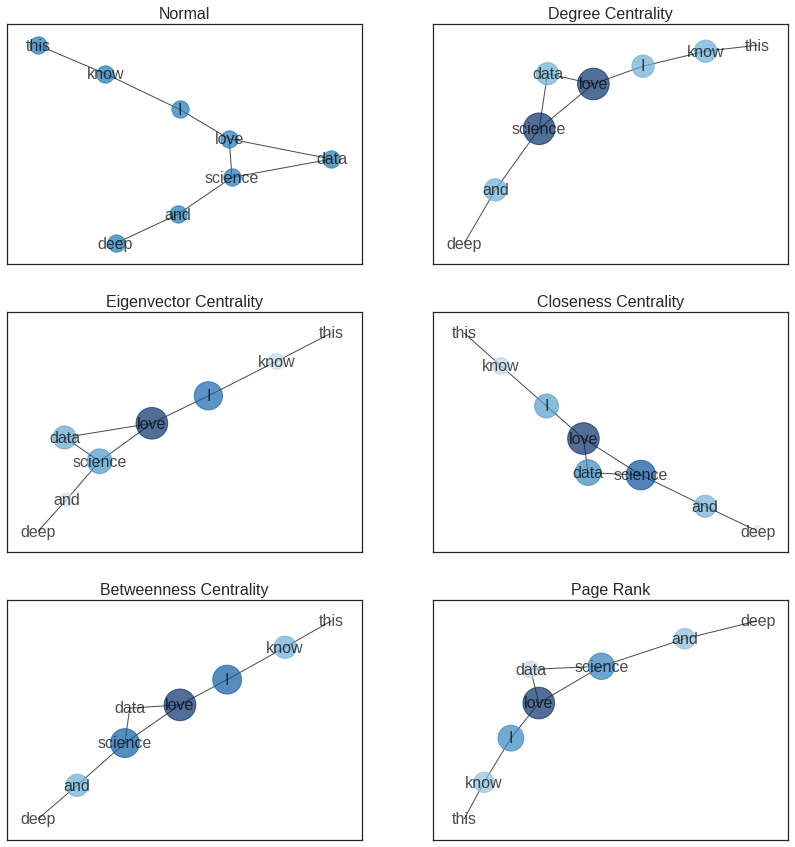

In [42]:
def get_node_size(node_val):
    nsize = np.array([v for v in node_val])
    nsize = 1000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

    return nsize

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

dc = nx.degree_centrality(G).values()
ec = nx.eigenvector_centrality(G, weight='weight').values()
cc = nx.closeness_centrality(G, distance='weight').values()
bc = nx.betweenness_centrality(G).values()
pr = nx.pagerank(G).values()

plt.figure(figsize=(14,15))
plt.axis('off')

plt.subplot(321)
plt.title('Normal', fontsize=16)
nx.draw_networkx(G, font_size=16, alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(322)
plt.title('Degree Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16, node_color=list(dc), node_size=get_node_size(dc), alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(323)
plt.title('Eigenvector Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16, node_color=list(ec), node_size=get_node_size(ec), alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(324)
plt.title('Closeness Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16, node_color=list(cc), node_size=get_node_size(cc), alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(325)
plt.title('Betweenness Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16, node_color=list(bc), node_size=get_node_size(bc), alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(326)
plt.title('Page Rank', fontsize=16)
nx.draw_networkx(G, font_size=16, node_color=list(pr), node_size=get_node_size(pr), alpha=0.7, cmap=plt.cm.Blues)

plt.show()